In [68]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score

/kaggle/input/smoking-status-prediction-b1/sample_submission.csv
/kaggle/input/smoking-status-prediction-b1/train.csv
/kaggle/input/smoking-status-prediction-b1/test.csv


In [69]:
train_data = pd.read_csv('/kaggle/input/smoking-status-prediction-b1/train.csv')
train_data

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,1,M,70,175,65,89.8,0.8,1.0,1,1,...,15.5,5,1.3,29,18,53,Y,0,Y,1
1,2,M,40,170,65,86.0,1.2,1.0,1,1,...,15.3,1,1.2,26,23,21,Y,1,Y,1
2,3,M,20,170,70,83.0,1.0,1.0,1,1,...,14.2,1,1.0,17,11,12,Y,0,N,0
3,4,F,60,145,50,77.0,0.4,0.5,1,2,...,12.8,1,0.5,26,12,13,Y,0,N,0
4,5,F,40,160,70,82.9,0.9,0.7,1,1,...,13.8,1,0.9,16,25,20,Y,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,39996,M,20,170,60,82.0,1.0,1.0,1,1,...,17.8,1,0.9,20,19,18,Y,0,Y,1
39996,39997,M,30,175,80,82.0,1.5,1.5,1,1,...,14.9,2,0.8,29,40,56,Y,1,Y,1
39997,39998,F,40,160,60,77.9,1.2,1.5,1,1,...,13.4,1,0.9,20,13,12,Y,0,N,0
39998,39999,M,35,175,90,101.6,1.2,1.0,1,1,...,13.8,1,0.7,27,58,42,Y,0,N,0


In [70]:
test_data = pd.read_csv('/kaggle/input/smoking-status-prediction-b1/test.csv')
test_data

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar
0,1,F,45,155,55,78.0,0.8,1.2,1,1,...,72,13.6,1,0.7,19,17,24,Y,1,N
1,2,F,40,160,55,74.0,0.9,0.9,1,1,...,114,14.7,1,0.9,32,22,8,Y,0,Y
2,3,M,40,175,85,97.0,1.5,1.0,1,1,...,97,14.7,1,0.7,20,29,62,Y,0,Y
3,4,M,60,160,50,72.0,1.0,1.2,1,1,...,107,14.7,1,0.9,22,14,28,Y,0,N
4,5,F,50,160,65,88.1,0.7,0.8,1,1,...,155,13.9,1,0.9,36,62,40,Y,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15687,15688,M,30,185,95,100.4,1.2,1.0,1,1,...,69,16.2,1,1.0,28,52,70,Y,0,Y
15688,15689,M,70,165,60,87.0,0.7,0.7,2,2,...,139,13.9,1,0.9,16,15,14,Y,0,N
15689,15690,M,30,160,65,71.0,1.2,1.2,1,1,...,92,15.5,1,1.0,22,18,24,Y,0,Y
15690,15691,M,35,170,75,84.2,1.0,1.0,1,1,...,124,16.2,1,1.1,26,55,73,Y,0,N


In [71]:
X = train_data.iloc[:, 1:-1]
y = train_data.iloc[:, -1]

In [72]:
ids = test_data.iloc[:, 0]
test_data = test_data.iloc[:, 1:]

In [73]:
train_data.isnull().sum()
#theres no null values in the dataset

ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

In [74]:
features = ['HDL', 'LDL', 'Cholesterol', 'triglyceride', 'tartar', 'dental caries', 'fasting blood sugar', 'hemoglobin', 'systolic', 'relaxation', 'gender', 
            'Urine protein', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'Gtp']
print(features)

['HDL', 'LDL', 'Cholesterol', 'triglyceride', 'tartar', 'dental caries', 'fasting blood sugar', 'hemoglobin', 'systolic', 'relaxation', 'gender', 'Urine protein', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'Gtp']


In [75]:
categorical_columns = [cols for cols in X.columns if X[cols].dtype=='object']
categorical_columns

['gender', 'oral', 'tartar']

In [76]:
X['oral']

0        Y
1        Y
2        Y
3        Y
4        Y
        ..
39995    Y
39996    Y
39997    Y
39998    Y
39999    Y
Name: oral, Length: 40000, dtype: object

Since all are Y, its not a useful feature.

In [77]:
X = X.drop(['oral'], axis=1)
test_data = test_data.drop(['oral'], axis=1)
test_data.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar
0,F,45,155,55,78.0,0.8,1.2,1,1,132,...,66,72,13.6,1,0.7,19,17,24,1,N
1,F,40,160,55,74.0,0.9,0.9,1,1,107,...,113,114,14.7,1,0.9,32,22,8,0,Y
2,M,40,175,85,97.0,1.5,1.0,1,1,120,...,54,97,14.7,1,0.7,20,29,62,0,Y
3,M,60,160,50,72.0,1.0,1.2,1,1,97,...,74,107,14.7,1,0.9,22,14,28,0,N
4,F,50,160,65,88.1,0.7,0.8,1,1,137,...,47,155,13.9,1,0.9,36,62,40,0,N


In [78]:
# Label encode (train['gender']) to 0 or 1
gender_map = {'F':0, 'M':1}
X['gender'] = X['gender'].map(gender_map)
test_data['gender'] = test_data['gender'].map(gender_map)

# Label encode (train['tartar']) to 0 or 1
tartar_map = {'N':0, 'Y':1}
X['tartar'] = X['tartar'].map(tartar_map)
test_data['tartar'] = test_data['tartar'].map(tartar_map)

In [79]:
X.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar
0,1,70,175,65,89.8,0.8,1.0,1,1,125,...,43,64,15.5,5,1.3,29,18,53,0,1
1,1,40,170,65,86.0,1.2,1.0,1,1,110,...,56,120,15.3,1,1.2,26,23,21,1,1
2,1,20,170,70,83.0,1.0,1.0,1,1,125,...,53,90,14.2,1,1.0,17,11,12,0,0
3,0,60,145,50,77.0,0.4,0.5,1,2,123,...,43,165,12.8,1,0.5,26,12,13,0,0
4,0,40,160,70,82.9,0.9,0.7,1,1,119,...,64,139,13.8,1,0.9,16,25,20,0,0


In [80]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [81]:
# Scale the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [82]:
test_scaled = scaler.transform(test_data)

**Random Forest Classifier**

In [116]:
# Random Forest
model1 = RandomForestClassifier(n_estimators=300,max_depth=60,random_state=50)
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

In [117]:
# Evaluate the model on the test set.
accuracy = model1.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.815


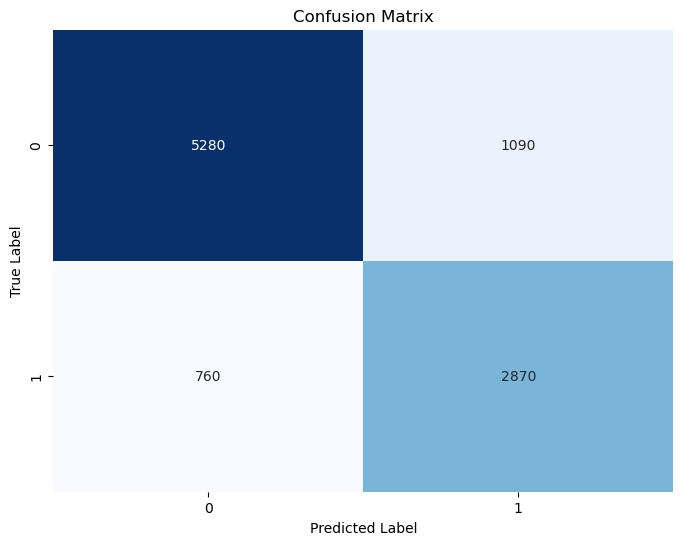

In [85]:
import seaborn as sns
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [86]:
predictions1 = model1.predict(test_scaled)

**Gradient Boosting**

In [102]:
# Gradient Boosting
model2 = GradientBoostingClassifier(n_estimators=300,learning_rate=0.1,max_depth=10,random_state=50)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

In [103]:
# Evaluate the model on the test set.
accuracy = model2.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8053


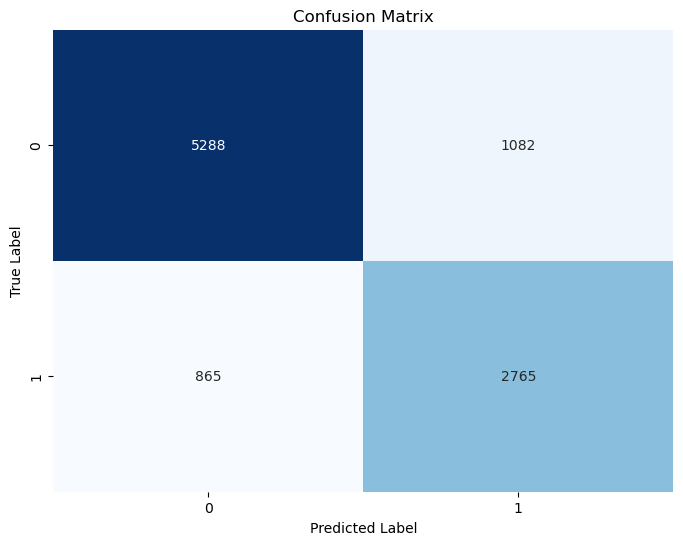

In [104]:
import seaborn as sns
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred2)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [105]:
predictions2 = model2.predict(test_scaled)

AdaBoost Classifier

In [91]:
model3 = AdaBoostClassifier(n_estimators=300,learning_rate=1,random_state=50)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

In [92]:
# Evaluate the model on the test set.
accuracy = model3.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7646


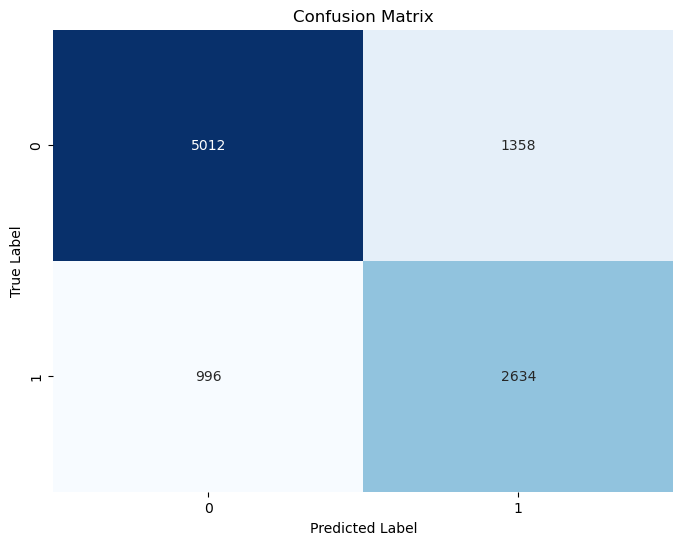

In [93]:
import seaborn as sns
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred3)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [94]:
predictions3 = model3.predict(test_scaled)

XG Boost Classifier

In [95]:
from xgboost import XGBClassifier
model4 = XGBClassifier(n_estimators=300, learning_rate=1, random_state=42)
scores = cross_val_score(model4, X_train, y_train, cv=5)
print("XGBoost Accuracy:", scores.mean())

XGBoost Accuracy: 0.7747333333333334


In [96]:
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)

In [97]:
# Evaluate the model on the test set.
accuracy = model4.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7915


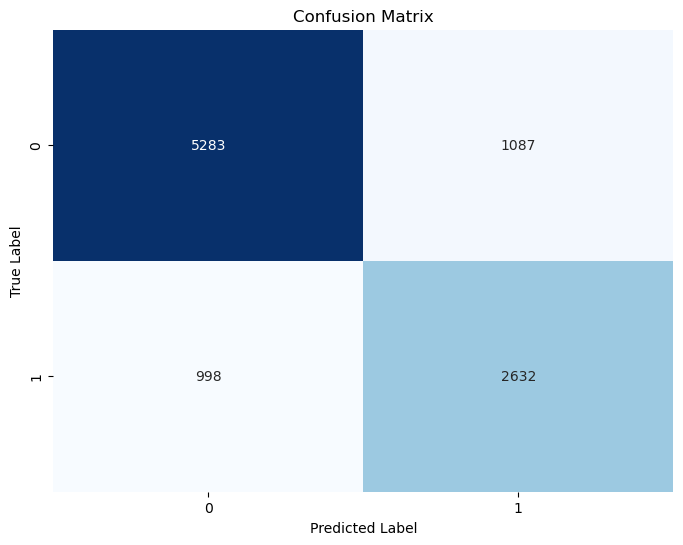

In [98]:
import seaborn as sns
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred4)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [99]:
predictions4 = model4.predict(test_scaled)

We can conclude that random forest classifier with the hyperparameters used gives the highest accuracy out of the the models. We will submit the predictions from that model.

In [119]:
submission = pd.DataFrame({'ID': ids, 'smoking': predictions1})
submission.to_csv('submission.csv', index=False)

In [120]:
submission

,ID,smoking
0,1,0
1,2,0
2,3,1
3,4,1
4,5,0
...,...,...
15687,15688,0
15688,15689,0
15689,15690,0
15690,15691,1
